In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

%matplotlib inline

In [4]:
iris = load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1 #convert to numeric. 


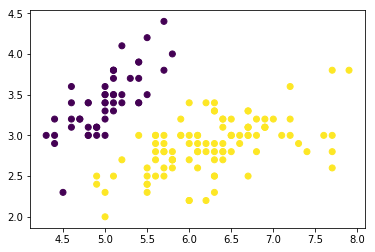

In [7]:
plt.scatter([i[0] for i in x], [i[1] for i in x], c=y)

In [23]:
class LogisticRegression(object):
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept  
        self.theta = 0
        
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def __loss(self, h, y):
        '''
        Computes J(theta), the loss of prediction.
        h is the estimated output, y is the true output
        '''
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

    
    def fit(self, x, y, verbose=False):
        '''
        x should be a nxm matrix. n samples, m features
        '''  
        #init weights. shape should be the number of features
        self.theta = np.zeros(x.shape[1])
        
        for i in range(self.num_iter):
            #calculate output for all samples
            h = np.dot(x, self.theta)

            #apply sigmoid
            pred = self.__sigmoid(h)

            #calculate loss
            if verbose:
                print self.__loss(h, y)
            
            #get gradient
            gradient = np.dot(x.T, (pred-y))/y.size
            
            #update weights
            self.theta -= self.lr * gradient
            
    def predict(self, x):
        predictions = self.__sigmoid(np.dot(x,  self.theta)) >=  0.5
        return predictions
        

In [24]:
lr = LogisticRegression()
lr.fit(x,y)


In [25]:
predictions = lr.predict(x)
sum(predictions==y)/float(len(y))

0.9333333333333333